<a href="https://colab.research.google.com/github/jadsoncastro/IA-codigos-disciplina/blob/main/Aprendizado-de-Maquina/Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar bibliotecas

In [ ]:
#Importar bibliotecas
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import MinMaxScaler

#Funções auxiliares

In [ ]:
def printMetrica(scores, algoritmo, metrica):
  print("Algoritmo: ", algoritmo)
  print("Metrica: ", metrica)
  print("Media: %.4f" % np.mean(scores))
  print("Desvio: %.4f\n" % np.std(scores))

In [ ]:
# Leitura dos dados
df = pd.read_csv("wpbc.data", delimiter=",", header=None, na_values="?")
df.rename(columns=lambda x: str(x), inplace=True) # Transformar rótulos das colunas em string, caso o conjunto não possua cabeçalho

#Informações sobre o conjunto de dados

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [ ]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,194.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.211340
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.479276
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       198 non-null    int64  
 1   1       198 non-null    object 
 2   2       198 non-null    int64  
 3   3       198 non-null    float64
 4   4       198 non-null    float64
 5   5       198 non-null    float64
 6   6       198 non-null    float64
 7   7       198 non-null    float64
 8   8       198 non-null    float64
 9   9       198 non-null    float64
 10  10      198 non-null    float64
 11  11      198 non-null    float64
 12  12      198 non-null    float64
 13  13      198 non-null    float64
 14  14      198 non-null    float64
 15  15      198 non-null    float64
 16  16      198 non-null    float64
 17  17      198 non-null    float64
 18  18      198 non-null    float64
 19  19      198 non-null    float64
 20  20      198 non-null    float64
 21  21      198 non-null    float64
 22  22

##Pre-processamento do conjunto de dados

###Tratamento de dados faltantes

Aqui listamos algumas opções possíveis para tratamento de dados faltantes.
* Remoção do(s) exemplo(s) com valor(es) faltante
* Remoção da(s) coluna(s) com valor(es) faltante(s)
* Preenchimento do(s) valor(es) faltante(s) com alguma medida estatística (ex: média)
* Coletar informações sobre o(s) dado(s) faltante(s) em outras fontes
* Utilizar um algoritmo de aprendizado de máquina para predizer o rótulo do(s) dado(s) faltante(s).
> * Neste caso, não levamos em consideração o rótulo do conjunto de dados.



In [ ]:
#Tratamento de dados faltantes:
# df.dropna() #remove todas as linhas com dados faltantes
# df.dropna(axis=1) #Remove todas com dados faltantes

df["34"].fillna(df["34"].mean(), inplace=True)

##Visualização dos atributos

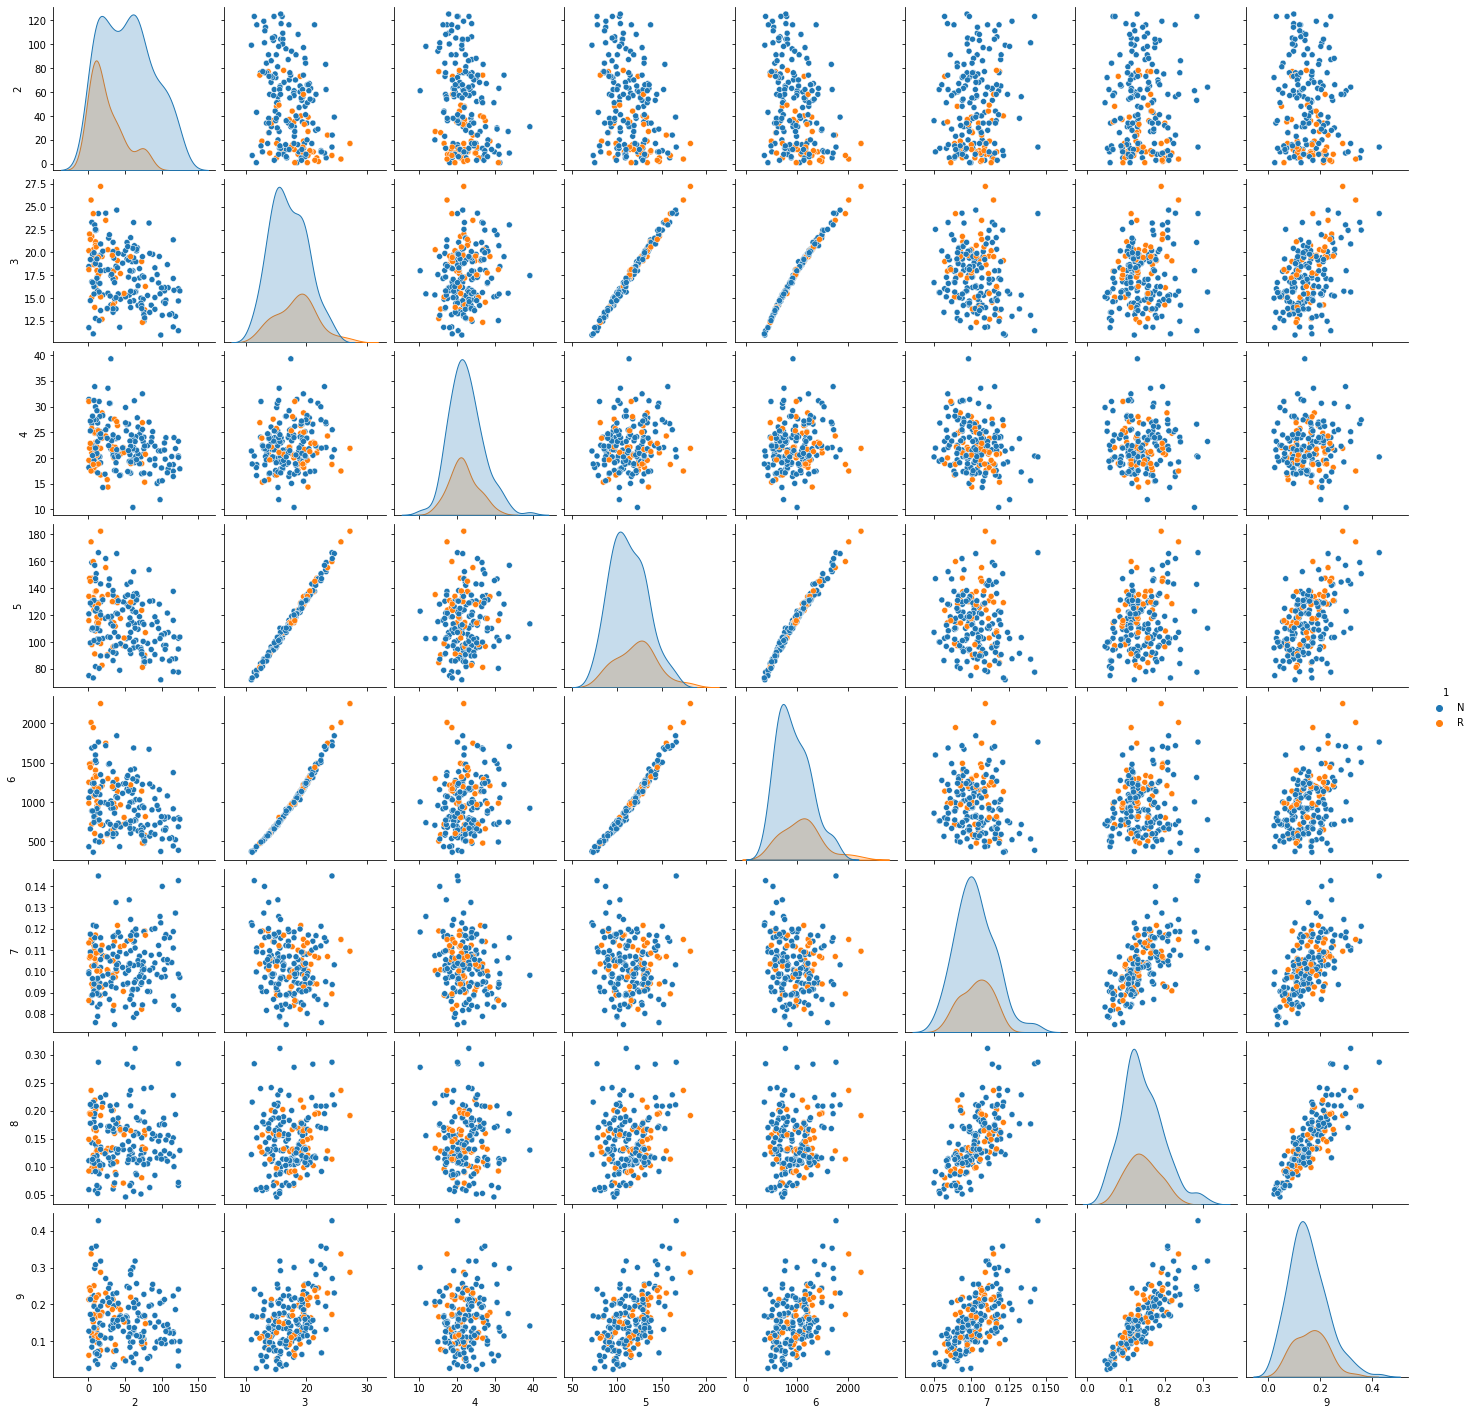

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df, hue="1", vars=list(map(lambda x: str(x), range(2,10))))

In [ ]:
#Visualização via boxplot
fig, axes = plt.subplots(6, 6)


##Normalização dos dados

In [ ]:
#Utilizar depois de treinar com os dados "crus"
X = df.values[:,2:]
y = df.values[:,1]

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

#Separação do conjunto em treinamento e teste

In [ ]:
# Separacao do conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

#Criação dos modelos de aprendizado

In [ ]:
# Criacao dos modelos de aprendizado
regressao = LogisticRegression()
arvore = DecisionTreeClassifier()
composicao = RandomForestClassifier()

#Validação Cruzada

Neste cenário realizamos a divisão do conjunto de treinamento em diversas "pastas". Uma vez definida, utilizamos $(k-1)$ pastas para o treinamento do modelo e a $k$-ésima pasta para a validação. Percebam que neste caso não estamos utilizando o conjunto de teste.

In [ ]:
#K-fold padrão (não leva em consideração as proporções das classes)
cv= KFold(n_splits=10, shuffle=True)

#k-Fold estratificado (leva em consideração as proporções das classes)
# cv StratifiedKFold(n_splits=10)

In [ ]:
scoresRegressao = cross_val_score(regressao, X_train,y_train, scoring="accuracy", cv=cv)
scoresArvore = cross_val_score(arvore, X_train,y_train, scoring="accuracy", cv=cv)
scoresComposicao = cross_val_score(regressao, X_train,y_train, scoring="accuracy", cv=cv)

##Exibindo resultados da validação cruzada

In [ ]:
printMetrica(scoresRegressao, "Regressão Logistica", "Acurácia")
printMetrica(scoresArvore, "Árvore de decisão", "Acurácia")
printMetrica(scoresComposicao, "Random Forest", "Acurácia")

Algoritmo:  Regressão Logistica
Metrica:  Acurácia
Media: 0.7962
Desvio: 0.0862

Algoritmo:  Árvore de decisão
Metrica:  Acurácia
Media: 0.6016
Desvio: 0.1135

Algoritmo:  Random Forest
Metrica:  Acurácia
Media: 0.7962
Desvio: 0.0880



#Referências


* [Dealing with missing values in pandas](https://towardsdatascience.com/8-methods-for-handling-missing-values-with-python-pandas-842544cdf891)

* [Plot par a par (pairplot) seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

* [Pré processamento dos dados](https://scikit-learn.org/stable/modules/preprocessing.html)

* [Regressão logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

* [Árvores de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)